# Titanic Project

Este projeto foi realizado por **Ivan Garcia Guimarães**.

## Introdução

O famoso RMS Titanic foi um navio operado pela White Star Line e construído pelos estaleiros da Harland and Wolff em Belfast. Sua construção começou em março de 1909 e ele foi lançado ao mar em maio de 1911. O Titanic foi pensado para ser o navio mais luxuoso e mais seguro já construido até então, considerado "inafundável" por muitos na época.

A embarcação partiu de inaugural de Southampton para Nova Iorque, no caminho passando em Cherbourg-Octeville na França e por Queenstown na Irlanda. Ele colidiu com um iceberg às 23h40min do dia 14 de abril e afundou na madrugada do dia seguinte com 3327 pessoas a bordo entre passageiros e tripulação. Seu acidente levou a mudanças nas leis internacionais de navegação que permanecem em vigor mais de um século depois.

## Dados ultilizados

Aqui realizarei algumas análises sobre os dados encontrados [neste site](https://www.kaggle.com/c/titanic/data). Fazendo assim, algumas perguntas relacionadas ao acidente onde irei desenvolver ao longo do projeto. Vale resaltar que nestes dados há somente um a parcela dos passageiros na qual embarcaram no Titanic.

## Perguntas

As perguntas propostas por min para serem respondidas foram:
<ol>
    <li>A classe do passageiro influenciou na taxa de sobrevivencia?</li>
    <li>Qual sexo teve a maior taxa de sobrevivência?</li>
    <li>Qual faixa etária teve maior taxa de sobrevivência mais?</li>
    <li>Pessoas viajando com familiares tiveram um idice de sobrevivencia maior?</li>
    <li>Quais tipos de passageiros tiveram um indice de sobrevivência maior levando em conta os fatores analisádos?</li>
</ol>    

In [70]:
#Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
from matplotlib.gridspec import GridSpec

In [5]:
#Lendo arquivo
t_data = pd.read_csv('titanic-data-6.csv')

In [6]:
#Exibindo as informações do dataframe
t_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## Preparando os Dados

Observamos que há informações em nosso dataframe onde não há necessidade para nós, por tanto, irei limpar ou melhor eliminar estas informações extras através do processo de eliminação de colunas. Pois, elas podem nos causar confusão na hora de analisarmos e diminui o uso de memória.

In [9]:
#removendo colunas que não serão utilizadas
t_data.drop(['PassengerId','Name','Ticket','Fare','Cabin','Embarked'],axis=1, inplace = True)
t_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
dtypes: float64(1), int64(4), object(1)
memory usage: 41.8+ KB


Agora que eliminamos as colunas desnecessárias em nosso dataframe, vamos modificar o nome das colunas para poder ter uma maior facilidade de intendimento e adequar ao nosso projeto.

In [51]:
#Alterando os nomes das colunas
t_data.columns = ['Vivo','Classe','Sexo','Idade','Parente_1','Parente_2']
t_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Vivo         891 non-null object
Classe       891 non-null int64
Sexo         891 non-null object
Idade        891 non-null int64
Parente_1    891 non-null int64
Parente_2    891 non-null int64
dtypes: int64(4), object(2)
memory usage: 41.8+ KB


Dataframe constando apenas as colunas necessárias e defidamente indentificadas, mas podemos observar que há valores faltantes em _'Idade'_, então vamos completa-lás com valores médios entre as idades.

In [46]:
#Completando valores faltantes
mean = t_data['Idade'].mean()
t_data['Idade'].fillna(mean, inplace=True)

In [52]:
#Verificando alteração
t_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Vivo         891 non-null object
Classe       891 non-null int64
Sexo         891 non-null object
Idade        891 non-null int64
Parente_1    891 non-null int64
Parente_2    891 non-null int64
dtypes: int64(4), object(2)
memory usage: 41.8+ KB


Perfeito, não há mais nenhum valor faltando. Então agora vamos verificar como estão as informações dentro da nossa tabela.

In [53]:
#Observando tabela
t_data.head()

,Vivo,Classe,Sexo,Idade,Parente_1,Parente_2
0,Nao,3,Homem,22,1,0
1,Sim,1,Mulher,38,1,0
2,Sim,3,Mulher,26,0,0
3,Sim,1,Mulher,35,1,0
4,Nao,3,Homem,35,0,0


Observando a tabela podemos ver que a coluna _'Vivo'_ e _'Sexo'_ podem ser modificadas para maior clareza de visualização e também o valor da idade está em float pois há _'.0'_ após o número inteiro. Então vamos modificar-los.

In [55]:
#Alterando nomeclaturas e modificando a Idade de 'Float' para 'int'
t_data['Vivo'] = t_data['Vivo'].replace([0,1],['Nao','Sim'])
t_data['Sexo'] = t_data['Sexo'].replace(['male','female'],['Homem','Mulher'])
t_data['Idade'] = pd.to_numeric(t_data.Idade, errors='coerce').fillna(0).astype(np.int64, inplace=True)

In [54]:
#Verificando modificação
t_data.head()

,Vivo,Classe,Sexo,Idade,Parente_1,Parente_2
0,Nao,3,Homem,22,1,0
1,Sim,1,Mulher,38,1,0
2,Sim,3,Mulher,26,0,0
3,Sim,1,Mulher,35,1,0
4,Nao,3,Homem,35,0,0


## Dicionário de Dados

Aqui listarei uma breve explicação de cada item em nosso dataframe para um maior intendimento. Segue abaixo:

</b>
<li>**Vivo:** Informa se o passageiro sobreviveu ou não ao naufrágio;</li>
<li>**Classe:** Informa a respeito da classe do ticket de embarque: 1 = 1°Classe, 2 = 2°Classe, 3 = 3°Classe;</li>
<li>**Sexo:** Informa o gênero do passageiro;</li>
<li>**Idade:** Informa a idade do passageiro;</li>
<li>**Parente_1:** Informa o tipo de relação familiar: Irmãos e Conjunges;</li>
<li>**Parente_2:** Informa o tipo de relação familiar: Pais e Filhos;</li>

## Visualização de Dados

Agora que nosso dataframe está com todas as infomações tratadas e claras para se trabalhar vamos iniciar as nossas análises.

### A classe do passageiro influenciou na taxa de sobrevivencia?

Como queremos descubrir qual classe teve uma maior taxa de sobrevivência, se teve alguma com uma variação significativa, então vamos separar-las entre: 1º classe, 2º classe e 3º classe.

In [140]:
#Observando a taxa de sobrevivência da 1º classe
vivo_1 = t_data.query('Classe == 1')
class_1 = vivo_1.groupby(['Vivo','Classe']).size()

In [141]:
#Observando a taxa de sobrevivência da 2º classe
vivo_2 = t_data.query('Classe == 2')
class_2 = vivo_2.groupby(['Vivo','Classe']).size()

In [142]:
#Observando a taxa de sobrevivência da 3°
vivo_3 = t_data.query('Classe == 3')
class_3 = vivo_3.groupby(['Vivo','Classe']).size()

Pronto, agora que descobrimos os valores vamos plotar os três gráficos em uma única imagem para uma maior facilidade na visualização e assim descobrirmos qual foram as diferências entre elas. Lembre-se eu estou procurando saber a taxa de sobrevivência então vamos ignorar os valores quantitativos. Pois as três classes têm valores diferêntes de passageiros, por tanto, iria causar um erro na hora de intepretar isso.

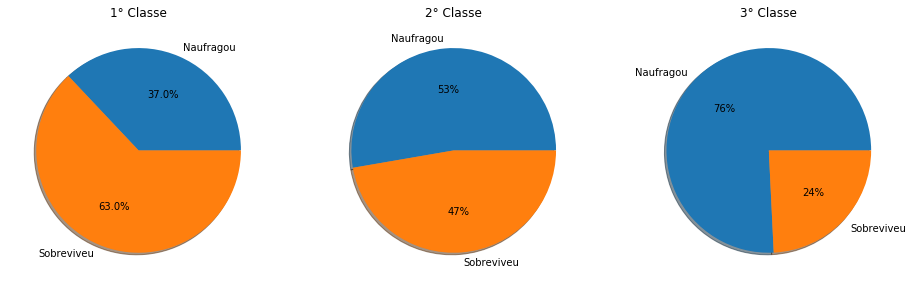

In [204]:
#Criando axes, figuras, títulos e tamanho

labels = 'Naufragou', 'Sobreviveu'

the_grid = GridSpec(3, 3)

ax1 = plt.subplot(the_grid[0, 0], aspect=1)
plt.pie((class_1), labels=labels, autopct='%1.1f%%', shadow=True)
ax1.set_title('1° Classe')

ax2 = plt.subplot(the_grid[0, 1], aspect=1)
plt.pie((class_2), labels=labels, autopct='%.0f%%', shadow=True,)
ax2.set_title('2° Classe')

ax3 = plt.subplot(the_grid[0, 2], aspect=1)
plt.pie((class_3), labels=labels, autopct='%.0f%%', shadow=True,)
ax3.set_title('3° Classe')

fig = plt.gcf()
fig.set_size_inches(16,16)

**Resposta:** sim, passageiros de *1º classe* tiveram uma taxa de 63% de sobreviveram enquanto *2º classe* cerca de 47% e *3º classe* cerca de 24%.

Agora sim por curiosidade vamos dar uma olhada nos valores quantitativos em cada classe para ver qual foi o dano causado entre os passageiros.

ValueError: shape mismatch: objects cannot be broadcast to a single shape

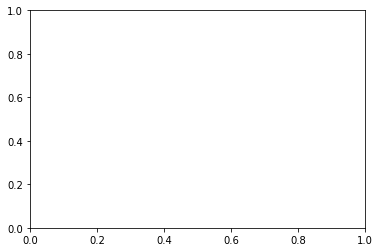

In [217]:
fig, ax = plt.subplots()
ind = np.arange(1, 4)

# show the figure, but do not block
plt.show(block=False)


pm, pc, pn = plt.bar(ind, get_stats(0))
pm.set_facecolor('r')
pc.set_facecolor('g')
pn.set_facecolor('b')
ax.set_xticks(ind)
ax.set_xticklabels(['Memory', 'CPU', 'Bandwidth'])
ax.set_ylim([0, 100])
ax.set_ylabel('Percent usage')
ax.set_title('System Monitor')

### Qual sexo teve a maior taxa de sobrevivência?

In [146]:
#Observando a taxa de sobrevivência do sexo masculino
vivo_h = t_data.query('Sexo == "Homem"')
data_h = vivo_h.groupby(['Vivo','Sexo']).size()

In [147]:
#Observando a taxa de sobrevivência do sexo feminino
vivo_m = t_data.query('Sexo == "Mulher"')
data_m = vivo_m.groupby(['Vivo','Sexo']).size()

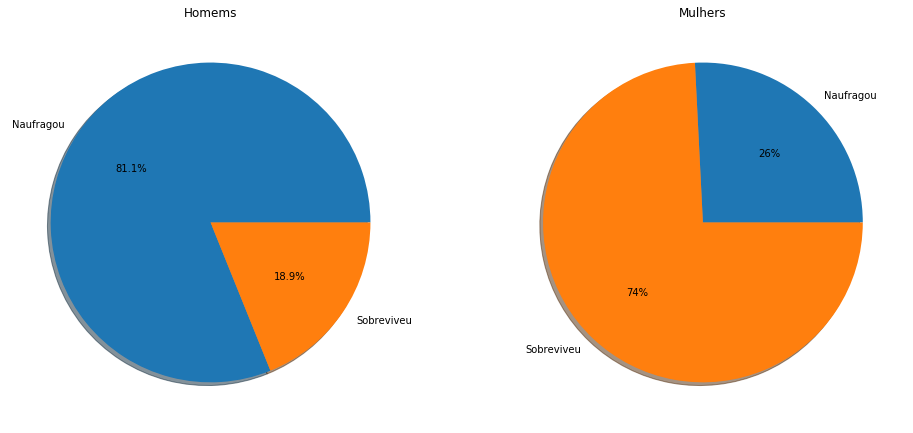

In [184]:
#Criando axes, figuras, títulos e tamanho

labels = 'Naufragou', 'Sobreviveu'

the_grid = GridSpec(3, 3)

ax1 = plt.subplot(the_grid[0, 0], aspect=1)
plt.pie((data_h), labels=labels, autopct='%1.1f%%', shadow=True)
ax1.set_title('Homems')

ax2 = plt.subplot(the_grid[0, 1], aspect=1)
plt.pie((data_m), labels=labels, autopct='%.0f%%', shadow=True,)
ax2.set_title('Mulhers')

fig = plt.gcf()
fig.set_size_inches(25,25)


**Conclusão:** O sexo femenino teve uma taxa de sobrevivência muito superior ao de masculino, *74% dos passageiros feminino* sobreviveram enquanto somente aproximadamente *19% dos passageiros masculinos* sobreviveram.

### Qual faixa etária teve maior taxa de sobrevivência mais?

In [159]:
#Observando a taxa de sobrevivência dos jovens
age_teen = t_data[t_data.Idade < 18]
teen = age_teen.groupby(['Vivo']).size()

In [160]:
#Observando a taxa de sobrevivência dos adultos
age_mid = t_data[(t_data.Idade <= 50)&(t_data.Idade >= 18)]
adults = age_mid.groupby(['Vivo']).size()

In [161]:
#Observando a taxa de sobrevivência dos idosos
age_old = t_data[t_data.Idade > 50]
old = age_old.groupby(['Vivo']).size()

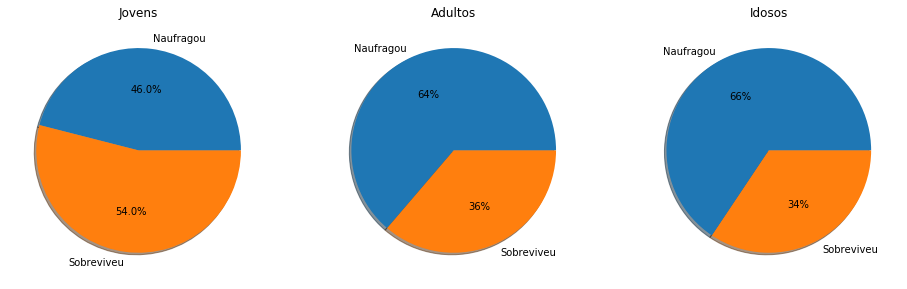

In [173]:
#Criando axes, figuras, títulos e tamanho

labels = 'Naufragou', 'Sobreviveu'

the_grid = GridSpec(3, 3)

ax1 = plt.subplot(the_grid[0, 0], aspect=1)
plt.pie((teen), labels=labels, autopct='%1.1f%%', shadow=True)
ax1.set_title('Jovens')

ax2 = plt.subplot(the_grid[0, 1], aspect=1)
plt.pie((adults), labels=labels, autopct='%.0f%%', shadow=True,)
ax2.set_title('Adultos')

ax3 = plt.subplot(the_grid[0, 2], aspect=1)
plt.pie((old), labels=labels, autopct='%.0f%%', shadow=True,)
ax3.set_title('Idosos')

fig = plt.gcf()
fig.set_size_inches(16,16)

**Conclusão:** A faixa etária que mais sobreviveu foram os *jovéns menores de 18 anos*, com uma taxa de de 54%, *adultos* até 50 anos com 36% e *idosos* acima dos 50 com uma taxa de 34%.

In [91]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null int64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(1), int64(6), object(5)
memory usage: 83.6+ KB


### Pessoas viajando com familiares tiveram um idice de sobrevivencia maior?

In [178]:
#Observando a taxa de sobrevivência dos acompanhados de familiares
td_bro = (t_data[t_data.Parente_1 >= 1]).dropna(how='any')
td_fam = (t_data[t_data.Parente_2 >= 1]).dropna(how='any')

familiar = (td_bro.groupby(['Vivo']).size() + td_fam.groupby(['Vivo']).size())

In [177]:
#Observando a taxa de sobrevivência dos desacompanhados de familiares
td_bro = t_data[t_data.Parente_1 == 0 ]
td_fam = t_data[t_data.Parente_2 == 0 ]

td_dup = td_fam[(td_fam.Parente_1==0) & (td_fam.Parente_2==0)]

solo = (td_bro.groupby(['Vivo']).size() + td_fam.groupby(['Vivo']).size() - td_dup.groupby(['Vivo']).size())

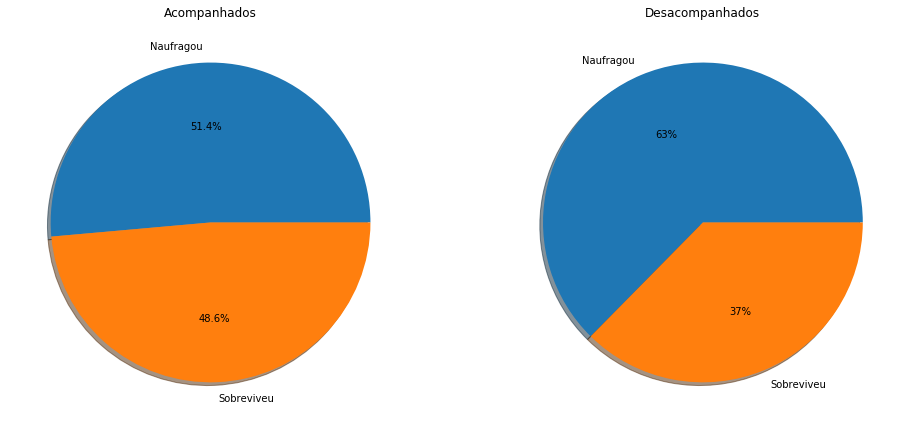

In [180]:
#Criando axes, figuras, títulos e tamanho

labels = 'Naufragou', 'Sobreviveu'

the_grid = GridSpec(3, 3)

ax1 = plt.subplot(the_grid[0, 0], aspect=1)
plt.pie((familiar), labels=labels, autopct='%1.1f%%', shadow=True)
ax1.set_title('Acompanhados')

ax2 = plt.subplot(the_grid[0, 1], aspect=1)
plt.pie((solo), labels=labels, autopct='%.0f%%', shadow=True,)
ax2.set_title('Desacompanhados')

fig = plt.gcf()
fig.set_size_inches(25,25)

**Conclusão:** Sim, pessoas acompanhadas de familiares tiveram uma taxa de apróximadamente 74% em quanto a de viajantes solos foram cerca de 37%.

### Quais tipos de passageiros tiveram um indice de sobrevivência maior levando em conta os fatores analisádos?

**Conclusão:** O perfil de pessoas que tiveram uma chance de sobrevivência maior no naufrágio do Titanic foram, passageiros do sexo feminino, pessoas acompanhadas por familiares, crianças e jovens e passageiros de 1º classe.

## Bibliografía

https://www.kaggle.com/c/titanic/data <br/>
https://pt.wikipedia.org/wiki/RMS_Titanic